# Plotting with Hypertools! (hyp.plot)

## Import the package

In [1]:
import hypertools as hyp

## Load your data

In this case, we have used one of the sample datasets built into the package

In [2]:
mushrooms = hyp.load('mushrooms')

We can peek at the first few rows of the dataframe using the pandas feature 'head(n)'

In [3]:
mushrooms.head(n=5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Plot the data with default settings

Hypertools can plot your high-dimensional data quickly and easily with little user-generated input. If you use the default settings, you will see that the package automatically reduces your data via principal component analysis (if dimensions > 3) and plots in 3d. 

The default is to output a line connecting the datapoints (useful for timecourse visualizations), but, in this case, showing individual points is more intuitive ( thus we employ '.' )

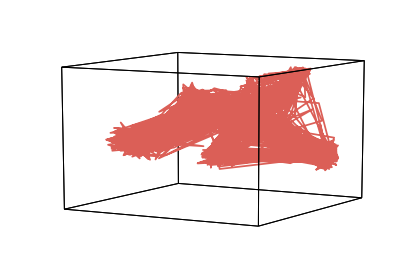

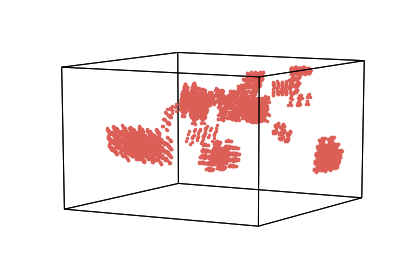

In [4]:
hyp.plot(mushrooms) # plots a line
hyp.plot(mushrooms, '.') # plots points

## Plotting in 2D 

We can also opt to plot high dimensional data in two dimensional space, rather than 3D, by passing the 'ndims' argument.

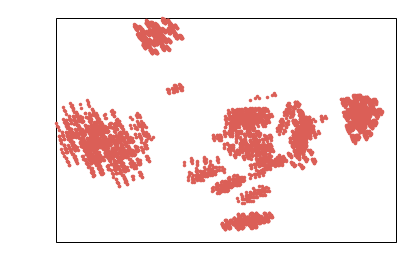

In [5]:
hyp.plot(mushrooms, '.', ndims=2)

## Data Reduction Options

To explore a data reduction method aside from the default (PCA), call the 'reduce' argument. 

Here, we pass the reduce argument a string, but for finer control of the model parameters, you may prefer to pass a dictionary, e.g. reduce={‘model’ : ‘PCA’, ‘params’ : {‘whiten’ : True}}. (see scikit-learn documentation for model-specific parameter information).

Accepted reduction models: PCA, IncrementalPCA, SparsePCA, MiniBatchSparsePCA, KernelPCA, FastICA, FactorAnalysis, TruncatedSVD, DictionaryLearning, MiniBatchDictionaryLearning, TSNE, Isomap, SpectralEmbedding, LocallyLinearEmbedding, MDS




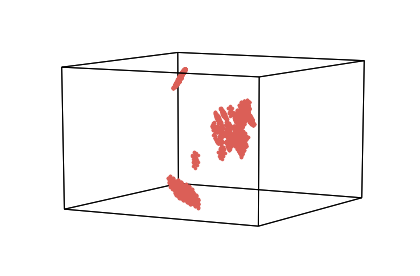

In [9]:
hyp.plot(mushrooms, '.', reduce='SparsePCA')

## Coloring by group

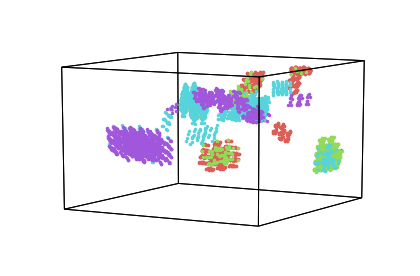

In [46]:
split = int(mushrooms.shape[0]/ 4)
groupings = [1]*split + ['two']*split + [3]*split + ['four']*split

hyp.plot(mushrooms, '.', group=groupings)